In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import ventilation_wall_parameters as vp

# 通気層を有する壁体の熱的性能に影響を及ぼす要因の分析
## 検証用データの設定
### 検証用パラメータ
    theta_e: 外気温度[degree C]
    theta_r: 室内温度[degree C]
    J_surf: 外気側表面に入射する日射量[W/m2]
    a_surf: 外気側表面日射吸収率[-]
    C_1: 外気側部材の熱コンダクタンス[W/(m2・K)]
    C_2: 室内側部材の熱コンダクタンス[W/(m2・K)]
    l_h: 通気層の長さ[m]
    l_w: 通気層の幅[m]
    l_d: 通気層の厚さ[m]
    angle: 通気層の傾斜角[°]
    v_a: 通気層の平均風速[m/s]
    l_s: 通気胴縁または垂木の間隔[m]
    emissivity_1: 通気層に面する面1の放射率[-]
    emissivity_2: 通気層に面する面2の放射率[-]
    
### 検証対象データ（仮）
    屋外側表面熱流[W/m2]
    通気層からの排気熱量[W/m2]
    室内表面熱流[W/m2]

In [2]:
# 総当たりのパラメータと計算結果を取得
df = pd.DataFrame(vp.get_wall_status_data_frame())

# CSV出力
df.to_csv("wall_status_data_frame.csv")

C:\Users\Norie Tsujimaru\Documents\Sourcetree\03_ventilation_layer\global_number.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (0.0074237 / (t + 390.15)) * ((t + get_abs_temp()) / 293.15) ** 1.5
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\Norie Tsujimaru\Documents\Sourcetree\03_ventilation_layer\ventilation_wall.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  matrix_coeff[4][1] = (1.0 + 1.0 / parm.l_h * 1.0 / beta * (math.exp(-beta * parm.l_h) - 1)) / 2
C:\Users\Norie Tsujimaru\Documents\Sourcetree\03_ventilation_layer\ventilation_wall.py:118: RuntimeWarning: invalid value encountered in double_scalars
  matrix_coeff[4][1] = (1.0 + 1.0 / parm.l_h * 1.0 / beta * (math.exp(-beta * parm.l_h) - 1)) / 2
C:\Users\Norie Tsujimaru\Documents\Sourcetree\03_ventilation_layer\ventilation_wall.py:119: RuntimeWarning: divide by zer

## 計算結果の検証テスト

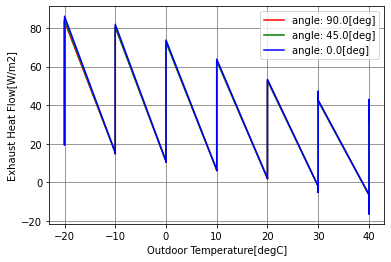

In [3]:
# グラフの描画（傾斜角別）
# TODO: for等の繰り返し処理で複数のグラフを描画できないか？
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('Outdoor Temperature[degC]')
ax1.set_ylabel('Exhaust Heat Flow[W/m2]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(df.query("angle == 90.0")['theta_e'], df.query("angle == 90.0")['heat_flow_exhaust'],linestyle='solid',
         color='r', label='angle: 90.0[deg]')
plt.plot(df.query("angle == 45.0")['theta_e'], df.query("angle == 45.0")['heat_flow_exhaust'],linestyle='solid',
         color='g', label='angle: 45.0[deg]')
plt.plot(df.query("angle == 0.0")['theta_e'], df.query("angle == 0.0")['heat_flow_exhaust'],linestyle='solid',
         color='b', label='angle: 0.0[deg]')

plt.legend()
plt.show()

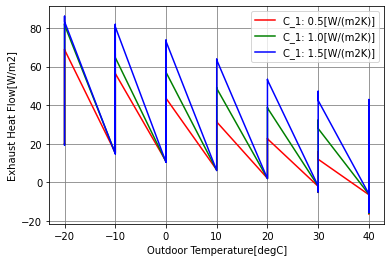

In [4]:
# グラフの描画（外装材の熱コンダクタンス別）
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('Outdoor Temperature[degC]')
ax1.set_ylabel('Exhaust Heat Flow[W/m2]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(df.query("C_1 == 0.5")['theta_e'], df.query("C_1 == 0.5")['heat_flow_exhaust'],linestyle='solid',
         color='r', label='C_1: 0.5[W/(m2K)]')
plt.plot(df.query("C_1 == 0.5")['theta_e'], df.query("C_1 == 1.0")['heat_flow_exhaust'],linestyle='solid',
         color='g', label='C_1: 1.0[W/(m2K)]')
plt.plot(df.query("C_1 == 0.5")['theta_e'], df.query("C_1 == 1.5")['heat_flow_exhaust'],linestyle='solid',
         color='b', label='C_1: 1.5[W/(m2K)]')

plt.legend()
plt.show()

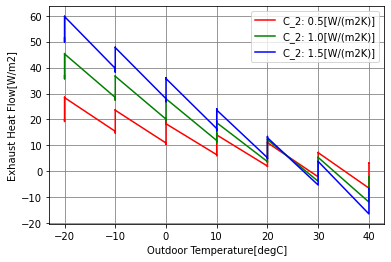

In [5]:
# グラフの描画（断熱層の熱コンダクタンス別、日射量を限定）

fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('Outdoor Temperature[degC]')
ax1.set_ylabel('Exhaust Heat Flow[W/m2]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(df.query("C_2 == 0.5 & j_surf == 200")['theta_e'], df.query("C_2 == 0.5 & j_surf == 200")['heat_flow_exhaust'],
         linestyle='solid', color='r', label='C_2: 0.5[W/(m2K)]')
plt.plot(df.query("C_2 == 0.5 & j_surf == 200")['theta_e'], df.query("C_2 == 1.0 & j_surf == 200")['heat_flow_exhaust'],
         linestyle='solid', color='g', label='C_2: 1.0[W/(m2K)]')
plt.plot(df.query("C_2 == 0.5 & j_surf == 200")['theta_e'], df.query("C_2 == 1.5 & j_surf == 200")['heat_flow_exhaust'],
         linestyle='solid', color='b', label='C_2: 1.5[W/(m2K)]')

plt.legend()
plt.show()